In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [324]:

df_train = pd.read_csv("D:\\projects\\LoanApproval\\loan_sanction_train.csv")
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [325]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [326]:
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [327]:
df_train = df_train.drop('Loan_ID',axis = 1)

In [328]:
df_train['Gender'] = df_train['Gender'].fillna(df_train['Gender'].mode()[0])
df_train['Married'] = df_train['Married'].fillna(df_train['Married'].mode()[0])
df_train['Dependents'] = df_train['Dependents'].fillna(df_train['Dependents'].mode()[0])
df_train['Self_Employed'] = df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0])
df_train['Credit_History'] = df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0])

In [329]:
df_train.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [330]:
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(round(df_train['LoanAmount'].mean(),2))
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(round(df_train['Loan_Amount_Term'].mean(),2))

In [331]:
df_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [332]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.41,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.00,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.00,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.00,360.0,1.0,Urban,Y


In [333]:
df_train['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [334]:
df_train['Dependents'] = df_train['Dependents'].replace('3+',3)

In [335]:
df_train['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

df['Education'].replace(['Under-Graduate', 'Diploma '],
                        [0, 1], inplace=True)

In [336]:
print(df_train['Gender'].value_counts())
print(df_train['Married'].value_counts())
print(df_train['Education'].value_counts())
print(df_train['Self_Employed'].value_counts())
print(df_train['Property_Area'].value_counts())
print(df_train['Loan_Status'].value_counts())

Male      502
Female    112
Name: Gender, dtype: int64
Yes    401
No     213
Name: Married, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     532
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


In [337]:
df_train['Gender'].replace(['Male','Female'],[0,1],inplace = True)
df_train['Married'].replace(['No','Yes'],[0,1],inplace = True)
df_train['Education'].replace(['Graduate','Not Graduate'],[0,1],inplace = True)
df_train['Self_Employed'].replace(['No','Yes'],[0,1],inplace = True)
df_train['Property_Area'].replace(['Semiurban','Urban','Rural'],[0,1,2],inplace = True)
df_train['Loan_Status'].replace(['N','Y'],[0,1],inplace = True)

In [338]:
print(df_train['Gender'].value_counts())
print(df_train['Married'].value_counts())
print(df_train['Education'].value_counts())
print(df_train['Self_Employed'].value_counts())
print(df_train['Property_Area'].value_counts())
print(df_train['Loan_Status'].value_counts())

0    502
1    112
Name: Gender, dtype: int64
1    401
0    213
Name: Married, dtype: int64
0    480
1    134
Name: Education, dtype: int64
0    532
1     82
Name: Self_Employed, dtype: int64
0    233
1    202
2    179
Name: Property_Area, dtype: int64
1    422
0    192
Name: Loan_Status, dtype: int64


In [339]:
df_train.corr()

C:\Users\SIMRAN\AppData\Local\Temp\ipykernel_30864\299540020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.corr()


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.364569,-0.045364,0.000525,-0.058809,-0.082912,-0.107930,0.073567,-0.009170,-0.109521,-0.017987
Married,-0.364569,1.000000,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,-0.007281,0.091478
Education,-0.045364,0.012304,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.073658,0.066740,-0.085884
Self_Employed,0.000525,0.004489,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,0.007124,-0.003700
ApplicantIncome,-0.058809,0.051708,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,0.017321,-0.004710
CoapplicantIncome,-0.082912,0.075948,-0.062290,-0.016100,-0.116605,1.000000,0.187829,-0.059675,0.011134,0.019087,-0.059187
LoanAmount,-0.107930,0.147141,-0.166998,0.115260,0.565620,0.187829,1.000000,0.038802,-0.001430,0.029023,-0.036416
Loan_Amount_Term,0.073567,-0.100863,-0.077242,-0.033943,-0.045242,-0.059675,0.038802,1.000000,0.000432,-0.017349,-0.020974
Credit_History,-0.009170,0.010938,-0.073658,-0.001550,-0.018615,0.011134,-0.001430,0.000432,1.000000,-0.033102,0.540556
Property_Area,-0.109521,-0.007281,0.066740,0.007124,0.017321,0.019087,0.029023,-0.017349,-0.033102,1.000000,-0.137545


<Axes: >

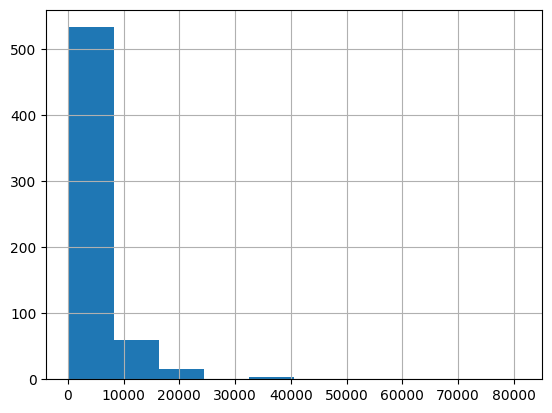

In [340]:
df_train['ApplicantIncome'].hist()

In [341]:
df_train['ApplicantIncome'] = df_train['ApplicantIncome'].apply(lambda x : np.log(x))

<Axes: >

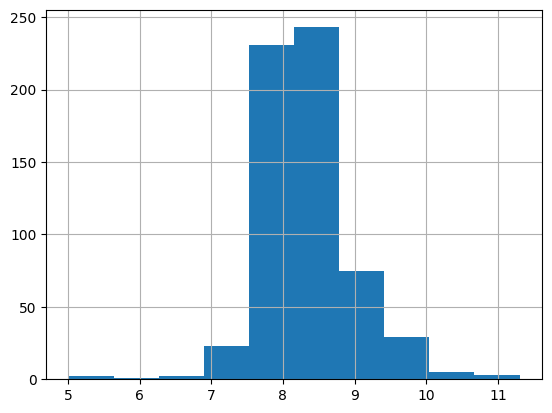

In [342]:
df_train['ApplicantIncome'].hist()

<Axes: >

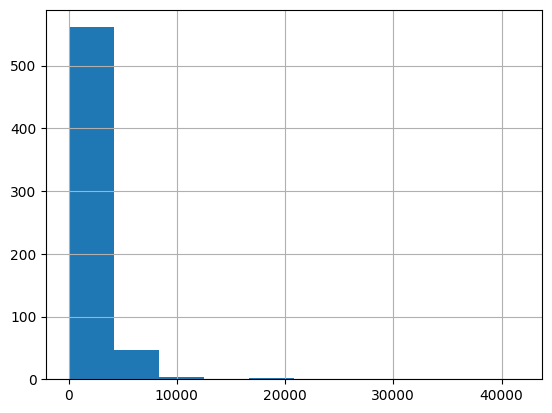

In [343]:
df_train['CoapplicantIncome'].hist()

In [344]:
df_train['CoapplicantIncome']

0         0.0
1      1508.0
2         0.0
3      2358.0
4         0.0
        ...  
609       0.0
610       0.0
611     240.0
612       0.0
613       0.0
Name: CoapplicantIncome, Length: 614, dtype: float64

In [345]:
df_train['CoapplicantIncome'] = df_train['CoapplicantIncome'].apply(lambda x : np.log(x) if x!=0 else x)

In [346]:
df_train['CoapplicantIncome']

0      0.000000
1      7.318540
2      0.000000
3      7.765569
4      0.000000
         ...   
609    0.000000
610    0.000000
611    5.480639
612    0.000000
613    0.000000
Name: CoapplicantIncome, Length: 614, dtype: float64

<Axes: >

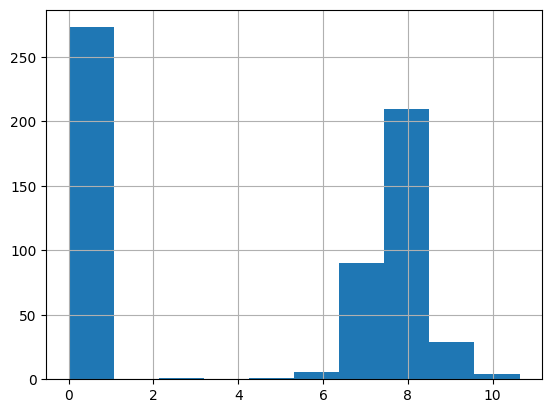

In [347]:
df_train['CoapplicantIncome'].hist()

<Axes: >

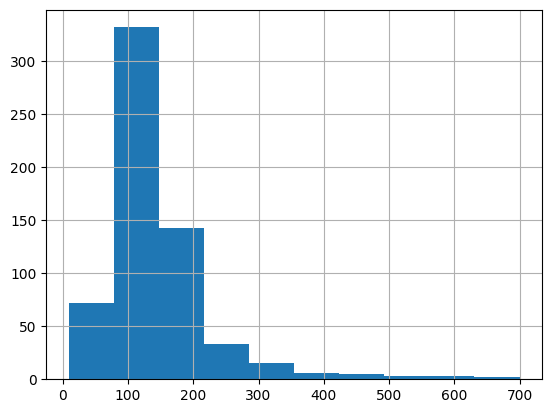

In [348]:
df_train['LoanAmount'].hist()

In [349]:
df_train['LoanAmount'] = df_train['LoanAmount'].apply(lambda x : np.log(x))

<Axes: >

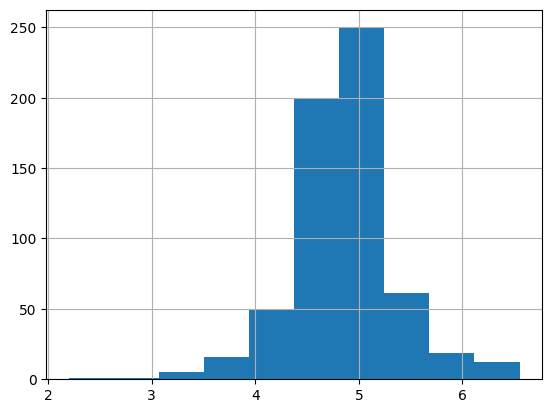

In [350]:
df_train['LoanAmount'].hist()

In [352]:
X = df_train.drop('Loan_Status',axis = 1)
Y = df_train['Loan_Status']


In [353]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

In [354]:
from sklearn.linear_model import LogisticRegression
lc = LogisticRegression()
lc.fit(xtrain,ytrain)

c:\users\simran\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [355]:
from sklearn.metrics import confusion_matrix

In [357]:
print(confusion_matrix(ytrain,lc.predict(xtrain)))

[[ 51  85]
 [  6 318]]


In [360]:
print(confusion_matrix(ytest,lc.predict(xtest)))

[[32 24]
 [ 1 97]]


In [361]:
y_pred_train=lc.predict(xtrain)

In [362]:
from sklearn.metrics import accuracy_score
acc= accuracy_score(ytrain, y_pred_train)
acc

0.8021739130434783

In [363]:
y_pred_test=lc.predict(xtest)

In [364]:
from sklearn.metrics import accuracy_score
acc= accuracy_score(ytest, y_pred_test)
acc

0.8376623376623377

In [369]:
def predict_approval(gen,mar,dep,edu,self_emp,app_in,coapp_in,loanamt,loanamtterm,credit_his,area):
    input_val = np.zeros(xtrain.shape[1])
    
    input_val[0] = 0 if gen == 'Male' else 1
    input_val[1] = 0 if mar == 'No' else 1
    input_val[2] = 3 if dep>=3 else dep
    input_val[3] = 0 if edu == 'Graduate' else 1
    input_val[4] = 0 if self_emp == 'No' else 1
    input_val[5] = np.log(app_in)
    input_val[6] = np.log(coapp_in) if coapp_in!=0 else coapp_in
    input_val[7] = np.log(loanamt)
    input_val[8] = loanamtterm
    input_val[9] = 0 if credit_his == 'No' else 1
    input_val[10] = 0 if area == 'Semiurban' else 1 if area == 'Urban' else 2 
    
    return 'Yes' if lc.predict([input_val]) == 1 else 'No'

In [370]:
predict_approval('Male','No',0,'Graduate','No',5849,0,146.41,360,1,'Urban')


c:\users\simran\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'Yes'

In [371]:
import pickle
with open('loan_approval.pickle','wb') as f:
    pickle.dump(lc,f)

In [372]:
import json
columns = {'data_columns': list(xtrain.columns)}

json.dumps(columns)

with open('loan_columns.json','w') as f:
    f.write(json.dumps(columns))